# Laboratorio 3

In [ ]:
# Diego Granada 201922383
# Felipe Russi 201914996
# Veronica Escobar 201922197

## Carga de datos

In [2]:
SHOW_PROFILE = False # REVISAR ANTES DE ENTREGAR
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn import preprocessing
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
import pickle
from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

In [4]:
#creaDataFrame
train_original_data = pd.read_csv('data/university_admission_train.csv', sep=',', encoding = 'utf-8', index_col=0)
test_original_data = pd.read_csv('data/university_admission_test.csv', sep=',', encoding = 'utf-8', index_col=0)
train_original_data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00
5,112,321,84,4,4.13,4.00,8.68,1,69.00
6,55,306,110,3,3.00,3.50,8.00,0,70.00
7,59,299,112,1,0.97,2.00,6.82,1,40.03
8,123,311,74,4,1.50,0.53,8.36,0,57.00
9,477,298,98,2,2.23,3.73,7.43,0,49.08


## Perfilamiento de datos

### Diccionario

|Variable|Descripción|
|---|---|
|Serial No.| Application id. Unique to each applicant |
|GRE Score| The Graduate Record Examination. An exam designed to measure overall academic readiness. 0 to 340 |
|TOEFL Score| Score in the Test of English as a Foreign Language obtained by the applicant. 0 to 120 |
|University Rating| Quality of the university where the applicant graduated. 0 to 5 |
|SOP| Statement of Purpose Strength. 0 to 5 |
|LOR| Letter of recomendation Strength. 0 to 5 |
|CPGA| Cumulative Grade Point Average. An score to measure academic performance in bachelor programs. 0 to 10|
|Research Experience| Does the applicant have research experience?. Either 0 or 1|
|Admission Points| Points obtained by the applicant in the university Masters Programs admission exam. 0 to 150|


In [5]:
print(train_original_data.shape)
train_original_data.info()

(1569, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         1569 non-null   int64  
 1   GRE Score          1569 non-null   int64  
 2   TOEFL Score        1569 non-null   int64  
 3   University Rating  1569 non-null   int64  
 4   SOP                1569 non-null   float64
 5   LOR                1569 non-null   float64
 6   CGPA               1569 non-null   float64
 7   Research           1569 non-null   int64  
 8   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 122.6 KB


Se puede ver que hay 9 columnas, todas numericas. El Serial No. se puede eliminar, debido a que no tiene efecto sobre la variable objetivo. Research es una variable de naturaleza booleana. University Rating, SOP y LOR tienen un rango de \[0,5], mientras que CPGA tiene rango de \[0,10].

Hay 1569 instancias en los datos, por lo cual toca tener cuidado con no eliminar un gran número de filas. Eliminar muchas podría reducir el rendimiento de la regresión final.

Como todas las columnas son númericas, no toca eliminar ninguna.

## Procesamiento y Entendimiento de los datos

In [6]:
train_data = train_original_data.copy()
test_data = test_original_data.copy()

train_data.isna().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Admission Points     65
dtype: int64

Solo hay 65 filas con valores nulos, y todas tienen solo la columna de Admission Points nula, nuestra variable objetivo. Debido a esto, podemos eliminar sin problema estas filas nulas, ya que no tiene punto dejar las filas con la variable de objetivo nula.

In [7]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
print(train_data.shape)

(1504, 9)


Observamos la distribución de los datos

In [8]:
train_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,240.139628,307.719415,101.579122,2.875000,2.976935,3.020439,8.345027,0.469415,66.744328
std,150.084546,17.843625,12.448552,1.239862,1.232544,1.212166,0.811192,0.499230,19.253029
min,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.760000,0.000000,48.000000
50%,236.000000,309.000000,103.500000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,378.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.050000,1.000000,84.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


Aca se vuelve claro que Serial No es solo un contador, por lo cual lo vamos a eliminar.

Ademas, empezamos a graficar la distribución de todas las columnas

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 117 to 483
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          175 non-null    int64  
 1   TOEFL Score        175 non-null    int64  
 2   University Rating  175 non-null    int64  
 3   SOP                175 non-null    float64
 4   LOR                175 non-null    float64
 5   CGPA               175 non-null    float64
 6   Research           175 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 10.9 KB


In [10]:
train_data.drop("Serial No.", inplace=True, axis=1)

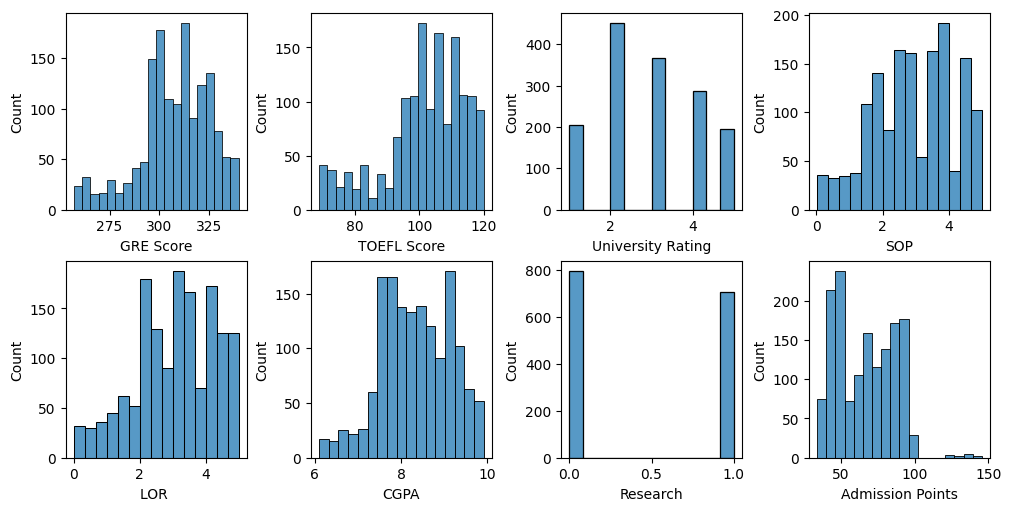

In [11]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10,5), constrained_layout = True)
for ax, col in zip(axs.flat, train_data.columns):
    sns.histplot(data=train_data[col], ax=ax)
fig.show()

In [12]:
train_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,327,113,4,4.00,2.77,8.88,1,84.47
1,301,92,1,1.85,1.50,7.71,0,45.08
2,297,100,1,2.41,1.59,7.89,0,47.42
3,303,98,3,3.50,3.00,8.50,0,62.00
4,320,94,2,1.38,3.50,8.78,1,73.00
...,...,...,...,...,...,...,...,...
1564,298,99,2,3.00,3.76,7.44,0,47.50
1565,312,77,1,1.00,1.71,8.01,1,52.00
1566,292,99,1,2.65,2.91,6.63,0,47.54
1567,312,105,2,4.41,3.00,8.37,0,64.00


### Relaciones entre variables
Ahora si podemos buscar relaciones entre las variables, para identificar que columnas son relevantes y cuales se pueden eliminar.

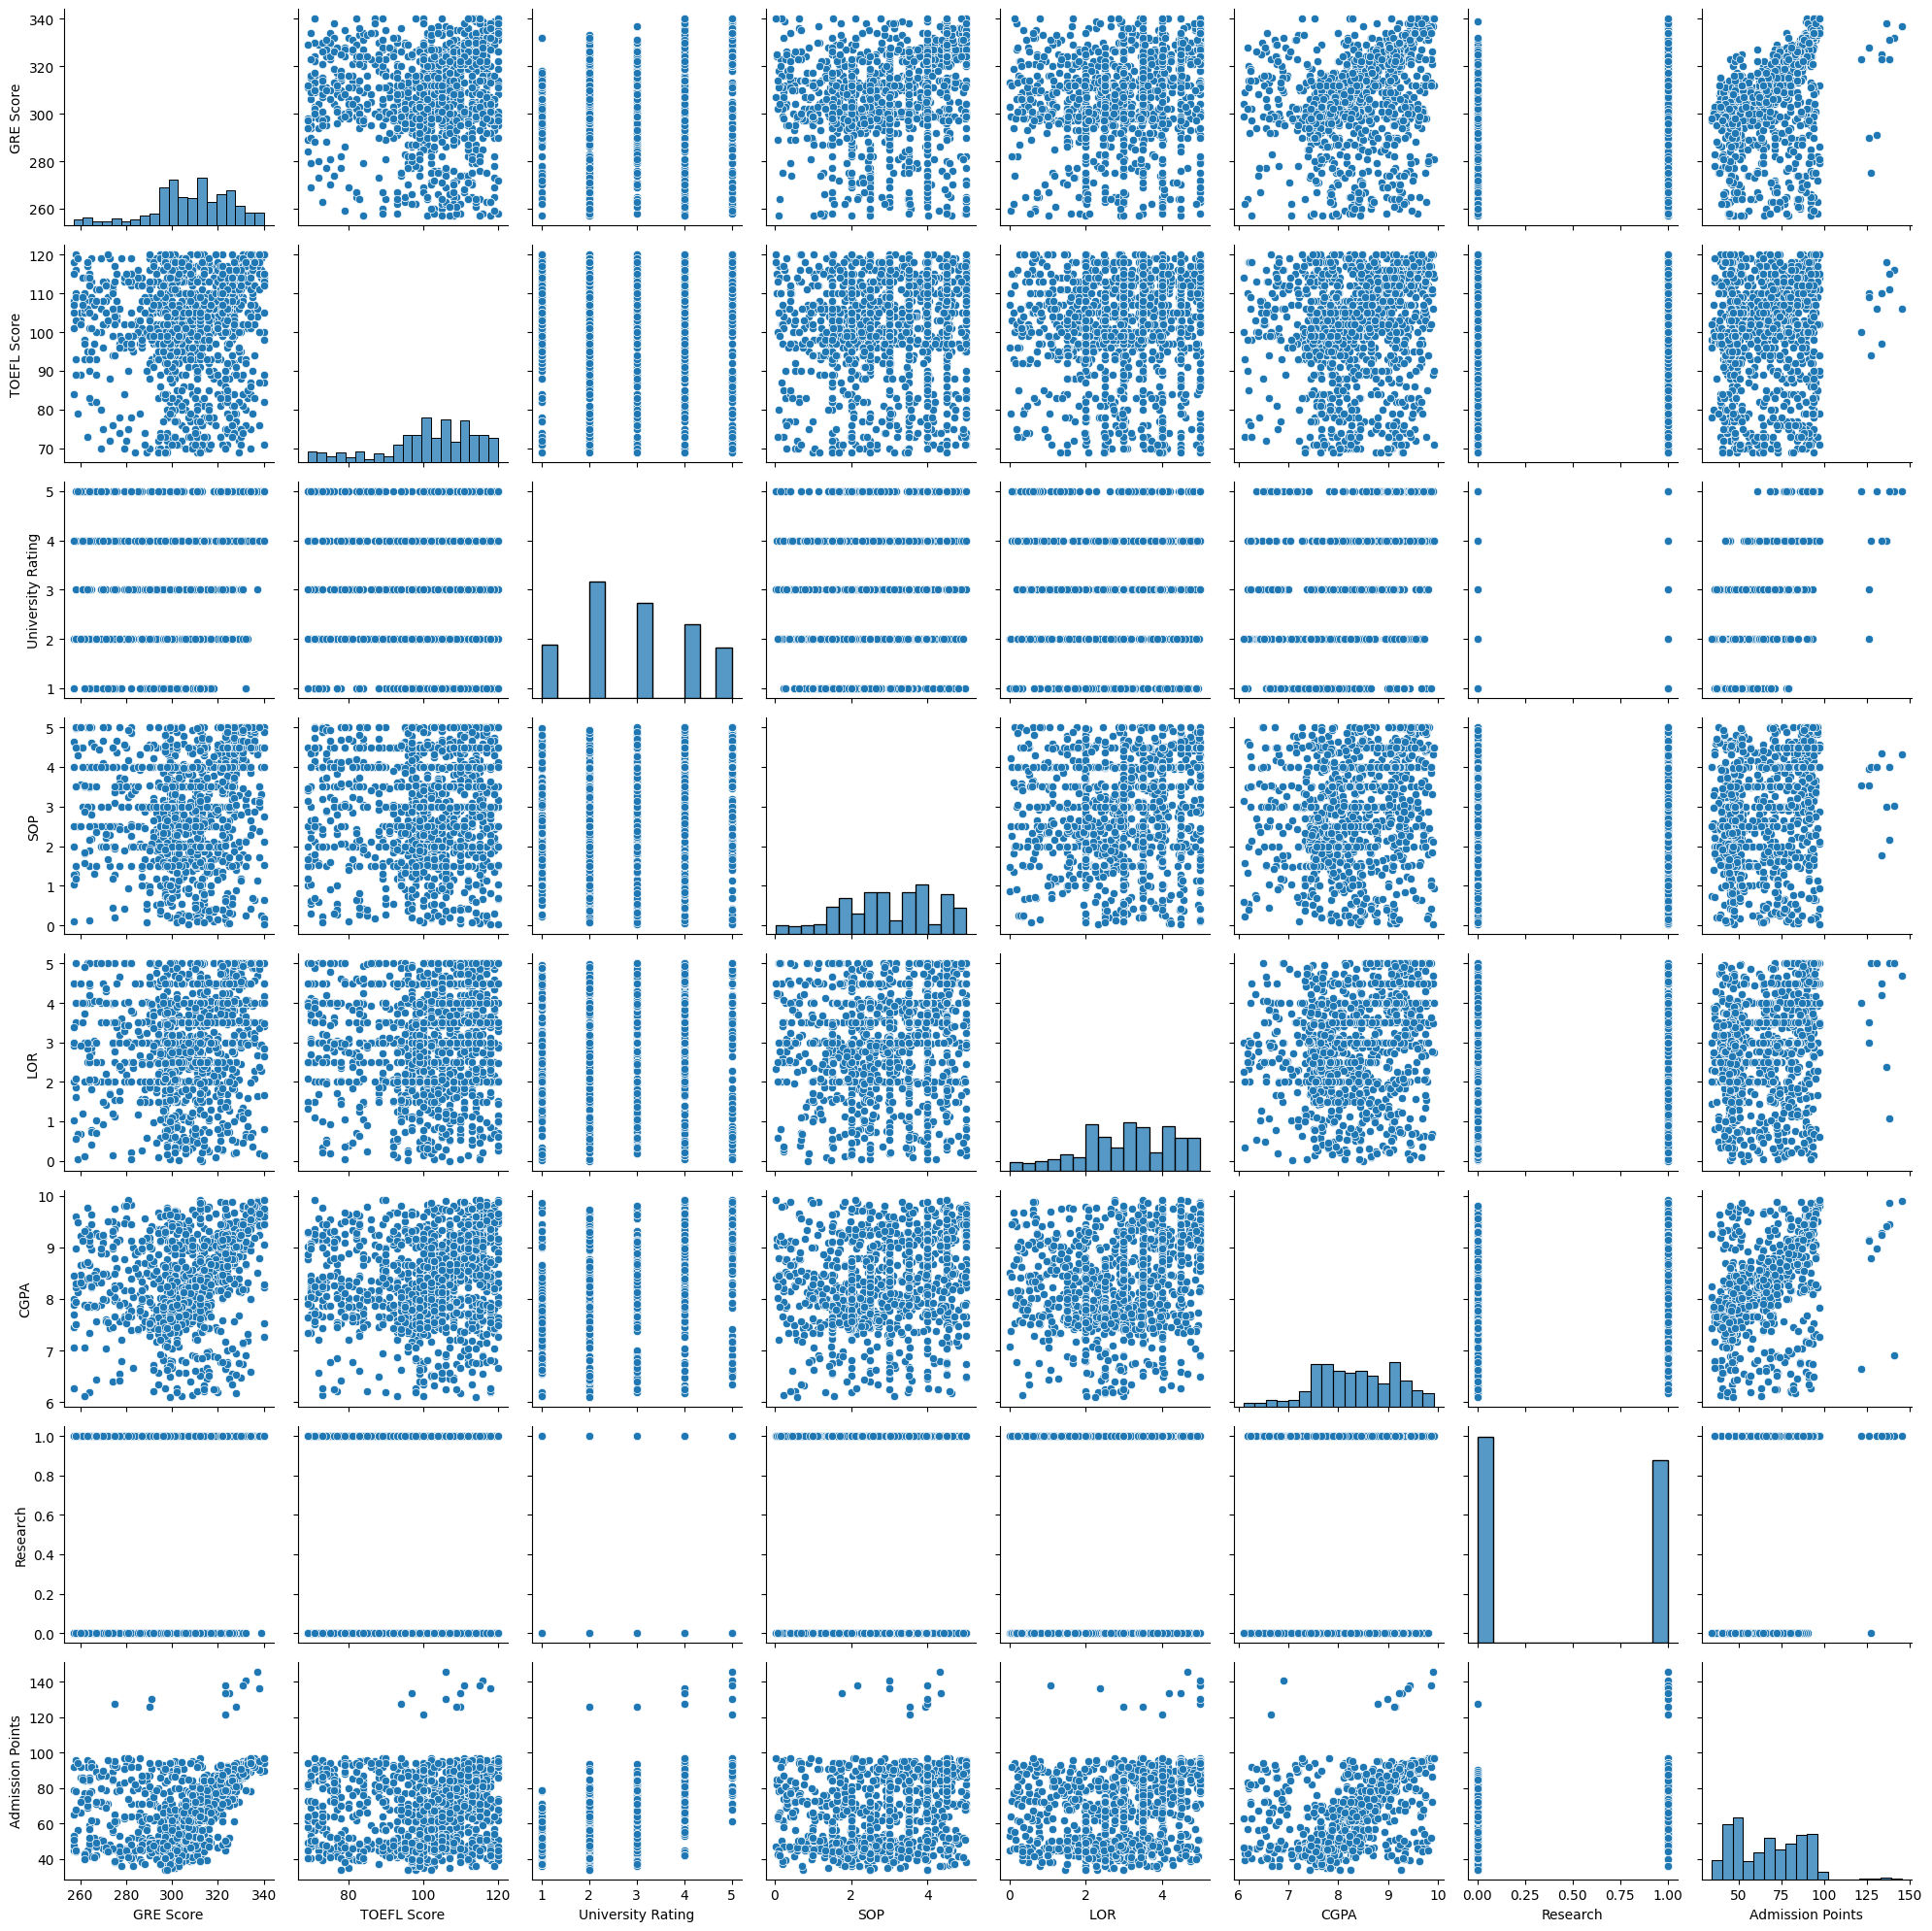

In [13]:
sns.pairplot(train_data)
plt.tight_layout()
plt.show()

En el pairplot no es super clara la relación de las columnas con la variable objetivo. Se puede ver una relación leve con las columnas CGPA y TOEFL. Tambien en Research se puede ver, pero como es una variable binaria, no es muy clara la fortaleza de la relación lineal. University Rating si parece tener una relacion lineal, pero como es una variable discreta, todavia tenemos dudas. En este caso, resultará mejor hacer una matriz de correlación

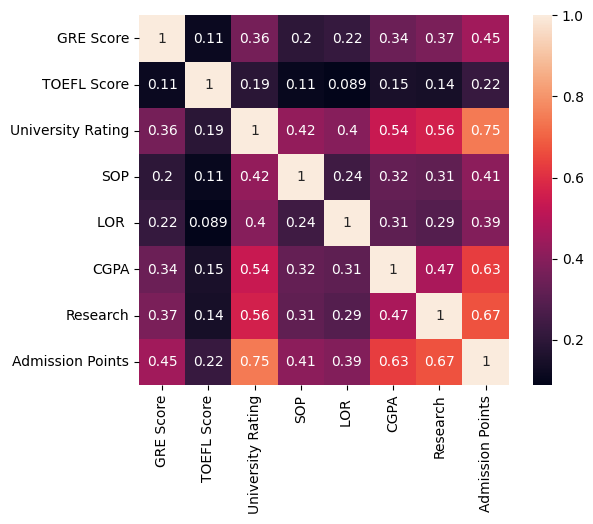

In [14]:
correlation_matrix = np.corrcoef(train_data.values.T)
heatmap = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, yticklabels=train_data.columns, xticklabels=train_data.columns)
plt.show()

Las relaciones se vuelven mucho mas claras aca. Podemos ver que University Rating, Research y CGPA  tienen las relaciones mas fuertes con la variable objetivo, en ese orden. Vamos a probar estas tres columnas para la regresión de variables multiples. 

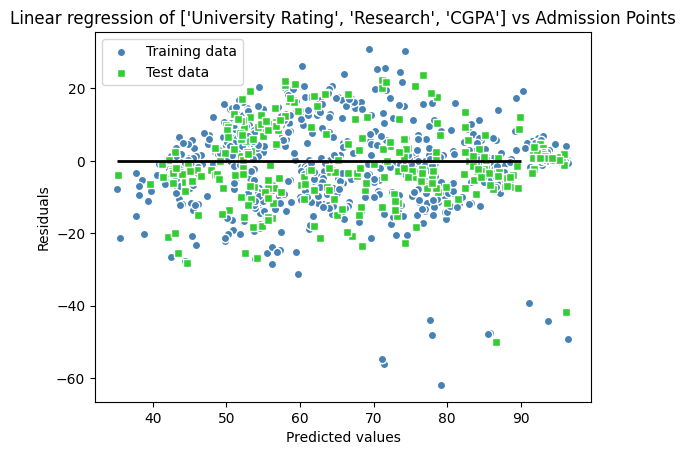

In [15]:
selected_cols = ["University Rating", "Research", "CGPA"]


X_test_base = train_data[selected_cols]

# Variables para escalar los datos, no se utilizaron
#scx = MinMaxScaler()
#scy = MinMaxScaler()
#X_base_mm = scx.fit_transform(X_base)
#y_base_mm = scy.fit_transform(y_base.to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.2, random_state=42, shuffle=True)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title(f'Linear regression of {selected_cols} vs Admission Points')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=90, color='black', lw=2)
plt.show()

In [16]:
y_base

0       84.47
1       45.08
2       47.42
3       62.00
4       73.00
        ...  
1564    47.50
1565    52.00
1566    47.54
1567    64.00
1568    72.00
Name: Admission Points, Length: 1504, dtype: float64

Se puede ver que los residuals tienen una distribución decentemente aleatoria centrada casi en 0, y no aparenta tener alguna otra relación (ej. logistica) o patrón. 

Podemos ahora analizar el MSE para comparar el error entre el set de entrenamiento, y de prueba.

In [17]:
print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}.\nMSE prueba: {mean_squared_error(y_test, y_test_pred)}')

MSE entrenamiento: 116.48461218776674.
MSE prueba: 108.46865318804575


En este caso, los puntajes de Mean Squared Error son bastante parecidos, por lo cual no parece que haya overfitting. 

## Configurando el pipeline

Ahora utilizando Pipeline.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer(
    [("selector", 'passthrough',selected_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                            ('regressor', LinearRegression())])
pipeline.fit(X_base, y_base)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['University Rating',
                                                   'Research', 'CGPA'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('regressor', LinearRegression())])

### Visualización del Modelo

Podemos visualizarlo de la siguiente manera:

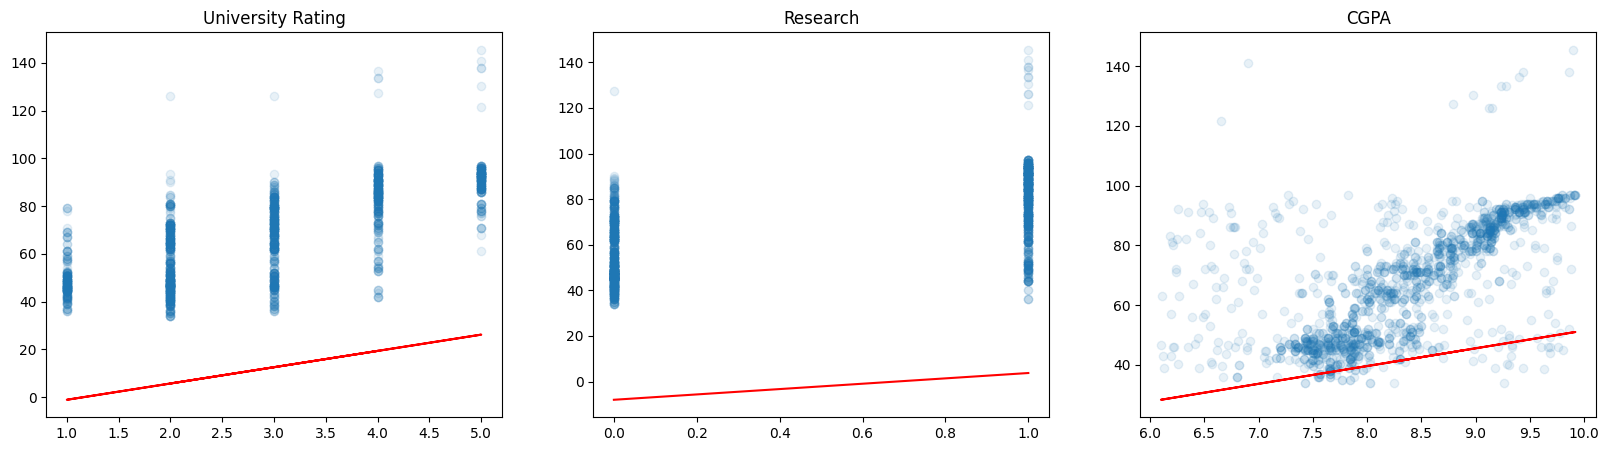

In [20]:
f, axs = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(selected_cols)):
    pos_col = i
    col = selected_cols[pos_col]

    x = X_base[col]
    
    m = pipeline.named_steps['regressor'].coef_[pos_col]
    b = pipeline.named_steps['regressor'].intercept_
    
    axs[i].plot(x, y_base, 'o', alpha = 0.1)
    axs[i].plot(x, m*x + b, color='red')
    axs[i].set_title(col)

Podemos ver la colinealidad de la siguiente manera:

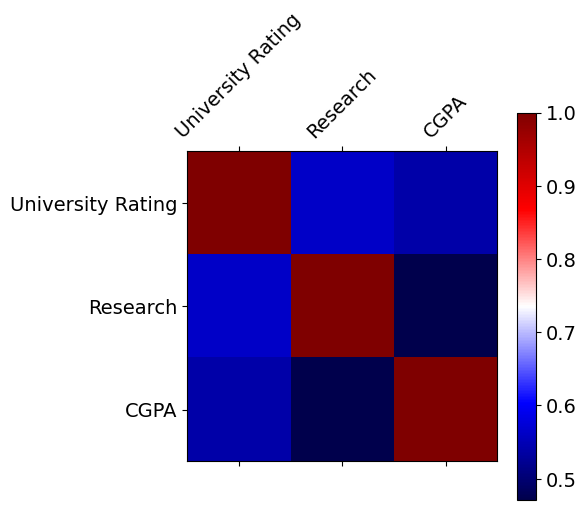

In [21]:
df_temp = train_data[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Concluimos que no hay mucha colinealidad entre las variables, así que no es necesario eliminar ninguna. Podemos realizar un gráfico Q-Q del modelo para entender mejor la distribución

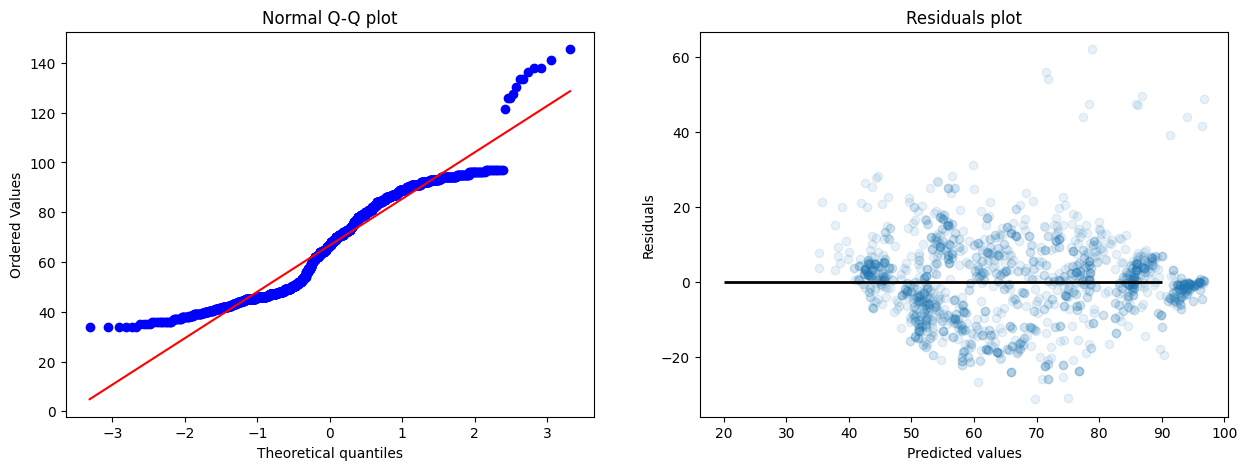

In [23]:
import scipy.stats as stats

f, axs = plt.subplots(1, 2, figsize=(15, 5))
y_pred = pipeline.predict(X_base)

stats.probplot(y_base, dist="norm", plot=axs[0])
axs[0].set_title('Normal Q-Q plot')

axs[1].scatter(y_pred, y_base - y_pred, alpha = 0.1)
axs[1].set_title('Residuals plot')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Residuals')
axs[1].hlines(y=0, xmin=20, xmax=90, color='black', lw=2)


No es una distribución normal, es más, tiende a ser más similar a una binomial como podemos ver a continuación.

/root/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


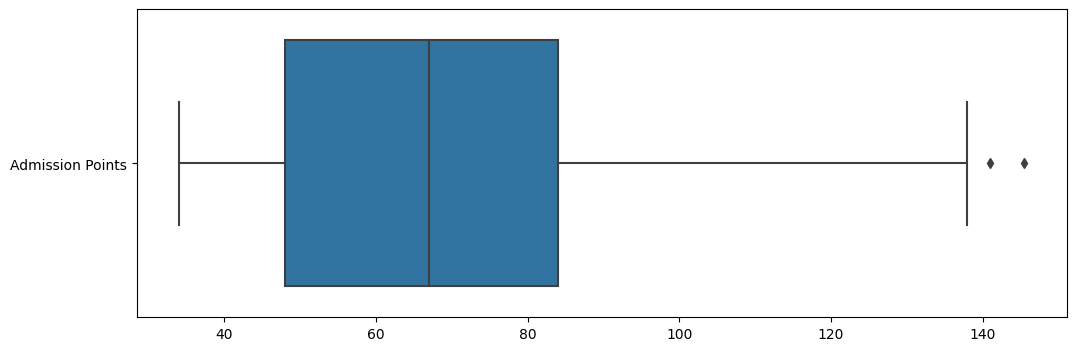

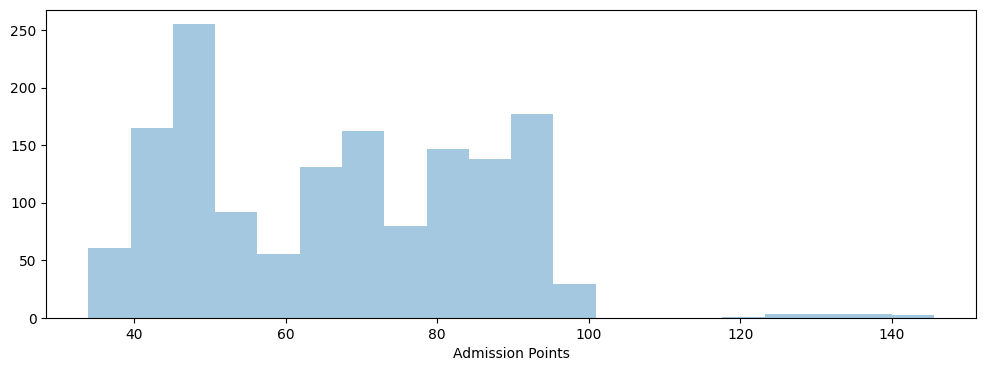

In [26]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= train_data[['Admission Points']], orient="h")

fig=plt.figure(figsize=(12,4))
ax = sns.distplot(train_data['Admission Points'], bins=20, kde=False)

Podemos quitar los valores no usuales y tenemos lo siguiente:

/root/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


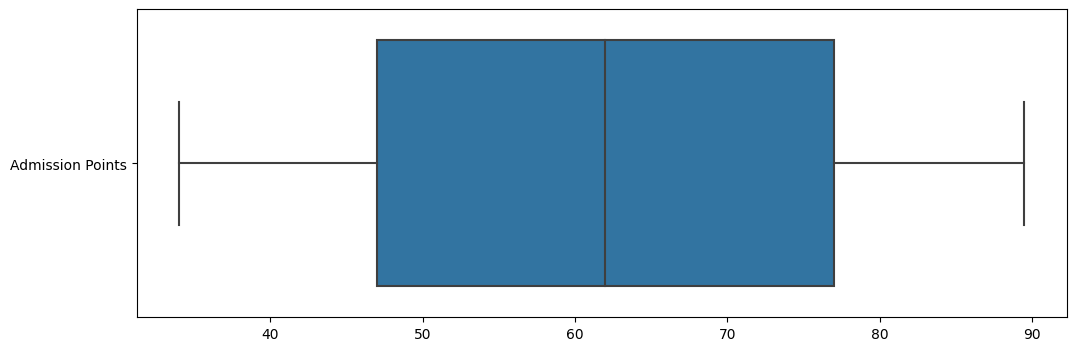

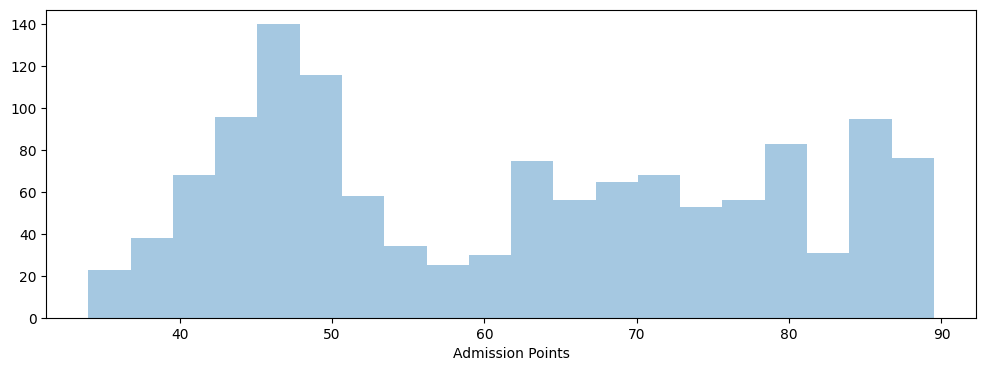

In [27]:
# Delete outliers
train_data = train_data[train_data['Admission Points'] < 90]

# Box plot of objective variable
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= train_data[['Admission Points']], orient="h")

# Plot the distribution of the objective variable
fig=plt.figure(figsize=(12,4))
ax = sns.distplot(train_data['Admission Points'], bins=20, kde=False)

Ahora, hacemos un tercer modelo

In [28]:
p3 = Pipeline([('initial',ColumnTransformer([("selector", 'passthrough', selected_cols)])),
               ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
               ('model', LinearRegression())])

p3 = p3.fit(X_base,y_base)

Tiene el siguiente score

In [29]:
p3.score(X_base,y_base)

0.690088535136133

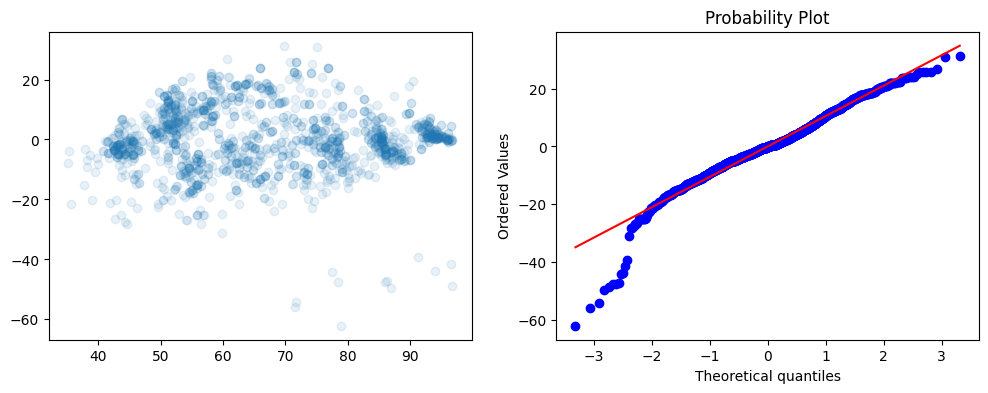

In [30]:
errors = (p3.predict(X_base) - y_base).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

#Dispersión de los errores
axes[0].scatter(p3.predict(X_base), errors, alpha = 0.1)

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [33]:
print('MSE:', mean_squared_error(y_base, p3.predict(X_base)))
print('RMSE:', np.sqrt(mean_squared_error(y_base, p3.predict(X_base))))

MSE: 114.80133408049075
RMSE: 10.714538444585036


In [35]:
import joblib
joblib.dump(p3, 'modelo.joblib')


['modelo.joblib']

Ahora, podemos predecir con el test dado por el cliente y tenemos el siguiente resultado.

In [41]:
filename = 'modelo.joblib' # Ubicación del archivo entregado
df_recent = pd.read_csv('data/university_admission_test.csv') # Lectura de los datos recientes

# Lee el archivo y carga el modelo
pipeline = joblib.load(filename)

y_predicted =  pipeline.predict(df_recent)


In [42]:
y_predicted

array([63.72302712, 76.82643259, 64.23398291, 87.27890782, 60.15640304,
       52.79500201, 85.61448325, 85.43615205, 61.04805906, 88.1111201 ,
       50.83335877, 51.84390225, 75.57811416, 58.0164286 , 48.93115926,
       86.2089206 , 94.22420271, 65.18508266, 84.60393976, 51.42779611,
       79.02585076, 89.2999948 , 92.32200321, 61.4641652 , 57.54087872,
       45.73081964, 94.04587151, 51.19002117, 72.96258984, 64.19857699,
       55.88607621, 46.44414446, 88.64611372, 50.23892142, 91.72756586,
       67.08728217, 87.16002035, 47.27635674, 59.32419076, 52.55722707,
       91.25201598, 49.94170275, 53.21110815, 71.89260261, 56.12385114,
       52.49778333, 67.08728217, 83.1178464 , 44.06639508, 53.38943935,
       51.0711337 , 59.19088752, 66.25506988, 96.12640222, 59.15548161,
       76.29143897, 54.93497645, 91.25201598, 76.70754512, 54.63775778,
       75.63755789, 86.68447047, 51.24946491, 53.92443296, 52.2600084 ,
       60.67698088, 86.68447047, 83.7957653 , 73.03165562, 58.01

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b26161d-4db3-4dff-ad21-929766523497' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>